In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Dataset Description
* RowNumber: The index of the row in the dataset, representing the customer’s entry order.
* CustomerId: A unique identifier for each customer.
* Surname: The surname of the customer.
* CreditScore: A numeric value representing the customer's creditworthiness.
* Geography: The country in which the customer resides (e.g., France, Spain).
* Gender: The gender of the customer (Male/Female).
* Age: The age of the customer in years.
* Tenure: The number of years the customer has been a client of the bank.
* Balance: The balance in the customer's bank account.
* NumOfProducts: The number of products that the customer holds with the bank.
* HasCrCard: Indicates if the customer has a credit card (1 = Yes, 0 = No).
* IsActiveMember: Indicates if the customer is an active member of the bank (1 = Active, 0 = Not Active).
* EstimatedSalary: The estimated salary of the customer.
* Exited: A binary variable indicating whether the customer has exited (churned) from the bank (1 = Yes, 0 = No).

In [21]:
df1= pd.read_csv('Churn_Modelling.csv', encoding='ISO-8859-1')  # or 'latin1'
df1.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## DATA INFO

In [22]:
df1.shape

(10000, 14)

In [23]:
print("Number of Rows",df1.shape[0])
print("Number of Columns",df1.shape[1])

Number of Rows 10000
Number of Columns 14


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [42]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
df1.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


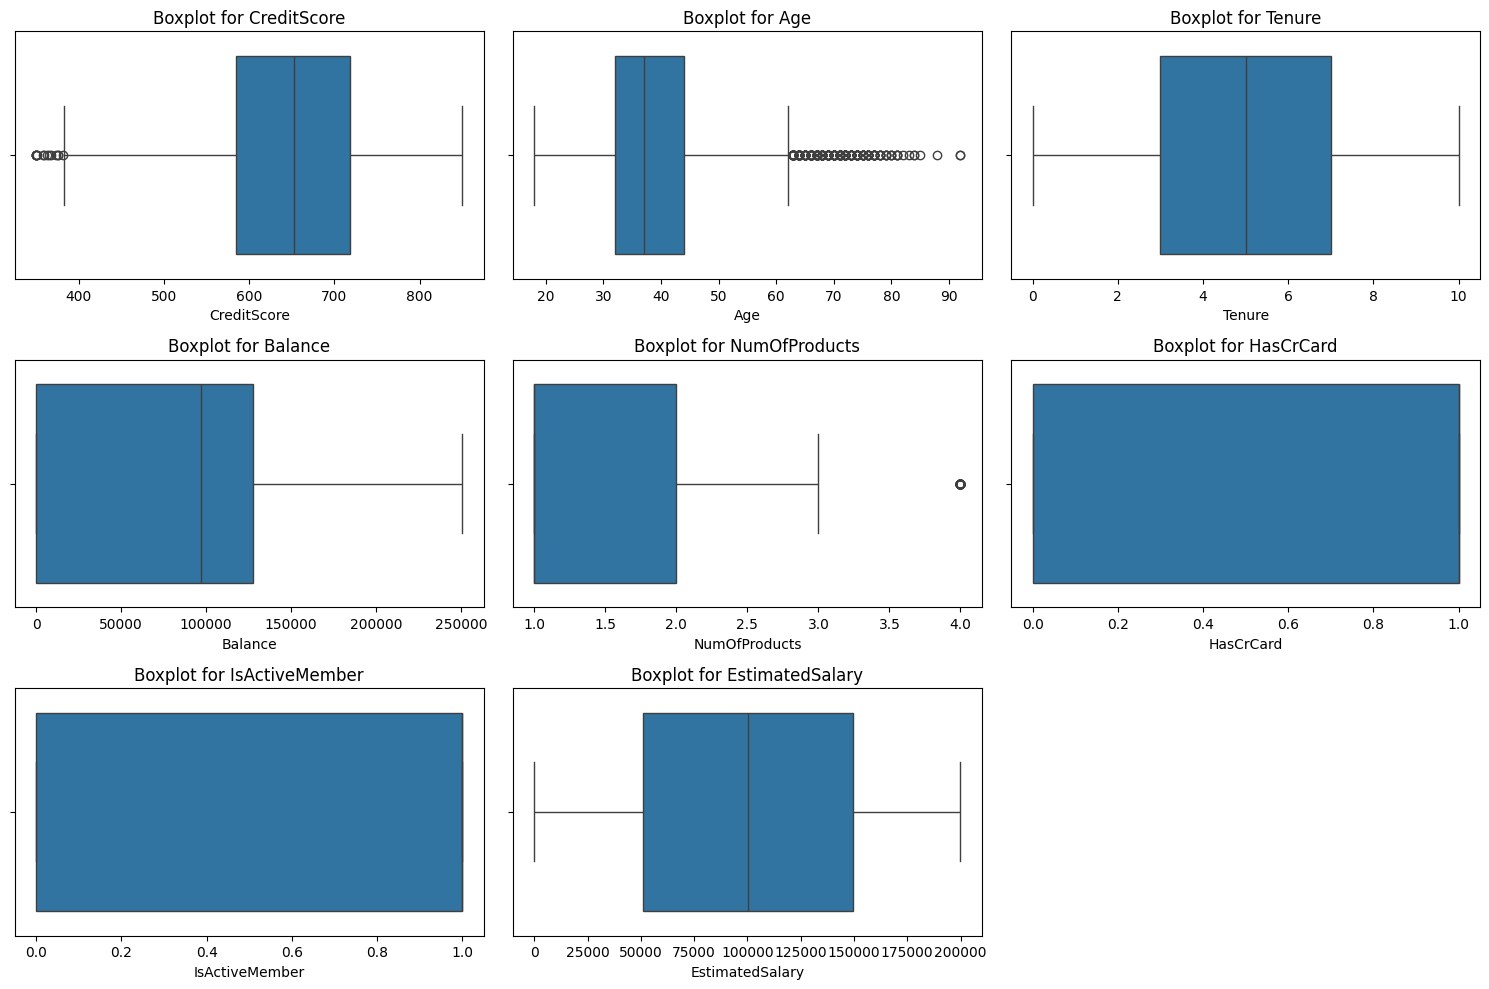

In [44]:
# Adjusting grid size for 7 plots (e.g., 3 rows and 3 columns)
numerical_cols=['CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
plt.figure(figsize=(15, 10))

# Loop through all numerical columns
for i, col in enumerate(numerical_cols, 1):  # Loop through all columns
    plt.subplot(3, 3, i)  # Adjusted to fit up to 9 plots
    sns.boxplot(data=df1, x=col)
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()


In [45]:
# Solving the outlier using Interquartile Range (IQR) for 'RecencyOfLastTransaction'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset by removing outliers
df= df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

# Display the number of rows after removing outliers
df.shape


(9641, 14)

## DATA VISUALIZATION

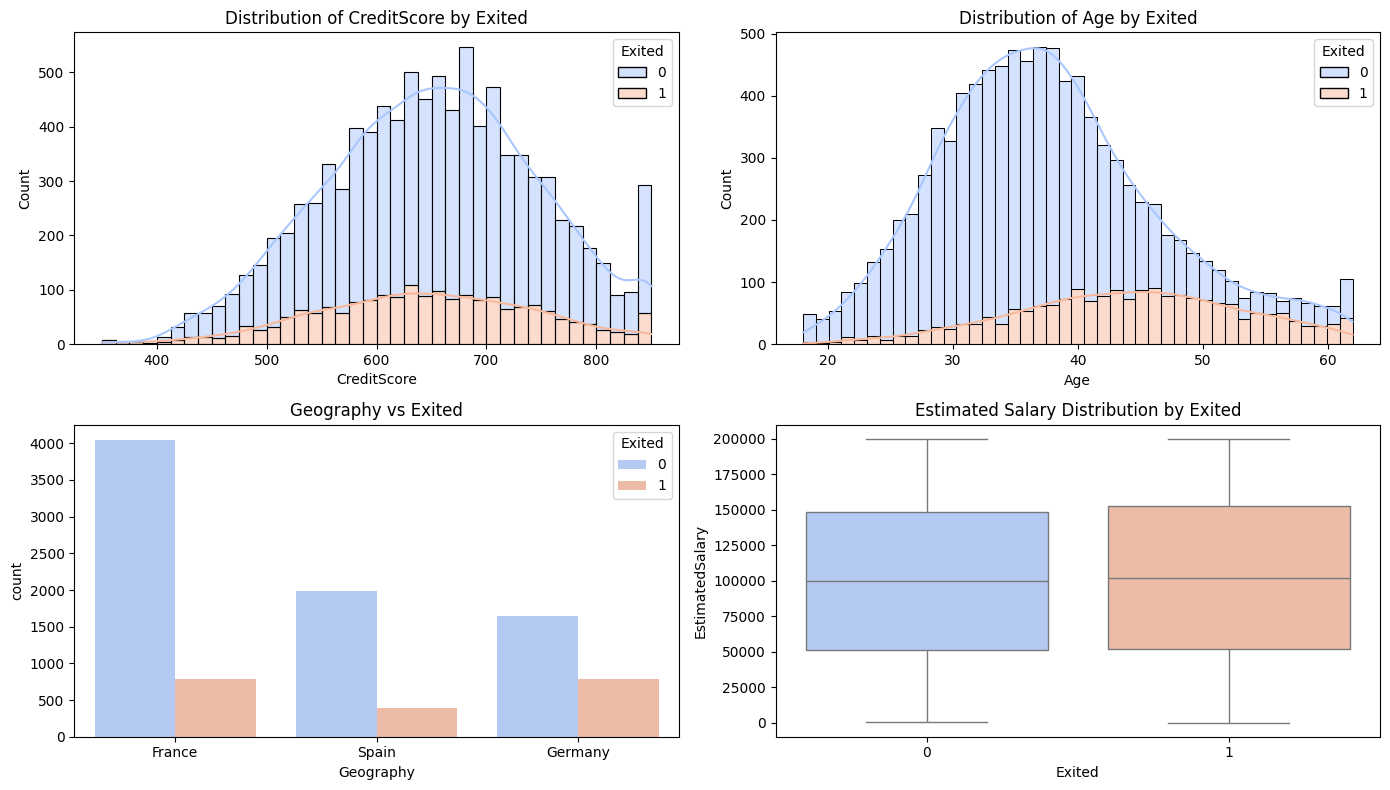

In [46]:
# Setting up the visualization
plt.figure(figsize=(14, 8))

# Plot 1: Distribution of CreditScore by Exited
plt.subplot(2, 2, 1)
sns.histplot(df, x="CreditScore", hue="Exited", kde=True, multiple="stack", palette="coolwarm")
plt.title("Distribution of CreditScore by Exited")

# Plot 2: Distribution of Age by Exited
plt.subplot(2, 2, 2)
sns.histplot(df, x="Age", hue="Exited", kde=True, multiple="stack", palette="coolwarm")
plt.title("Distribution of Age by Exited")

# Plot 3: Bar plot of Geography vs Exited
plt.subplot(2, 2, 3)
sns.countplot(data=df, x="Geography", hue="Exited", palette="coolwarm")
plt.title("Geography vs Exited")

# Plot 4: Boxplot of EstimatedSalary by Exited
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x="Exited", y="EstimatedSalary", palette="coolwarm")
plt.title("Estimated Salary Distribution by Exited")

plt.tight_layout()
plt.show()


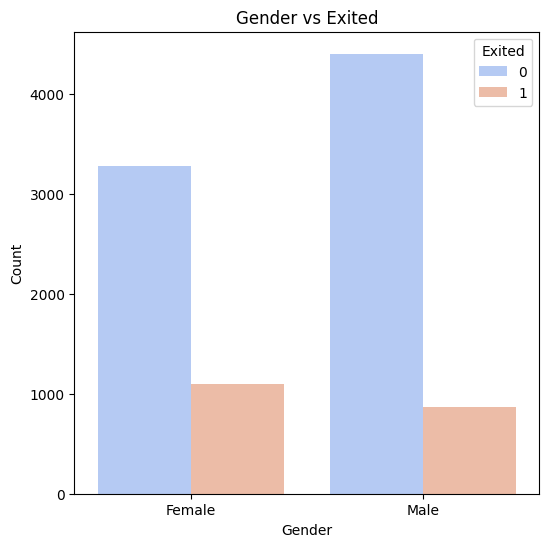

In [47]:
# Visualization of Gender vs Exited
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="Gender", hue="Exited", palette="coolwarm")
plt.title("Gender vs Exited")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


In [48]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [49]:
data = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [50]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
data = pd.get_dummies(data,drop_first=True)

In [64]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [65]:
data['Exited'].value_counts()

Exited
0    7677
1    1964
Name: count, dtype: int64

In [66]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [68]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_sm, y_sm =smote.fit_resample(X,y)

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.20,random_state=42)

In [78]:
sc= StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## MODEL EVALUATION AND TRAINING

In [73]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [79]:
# Instantiate the model
rf_model = RandomForestClassifier( random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.85965483555845
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86      1546
           1       0.86      0.85      0.86      1525

    accuracy                           0.86      3071
   macro avg       0.86      0.86      0.86      3071
weighted avg       0.86      0.86      0.86      3071

Confusion Matrix:
 [[1338  208]
 [ 223 1302]]


In [80]:
# Extracting feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

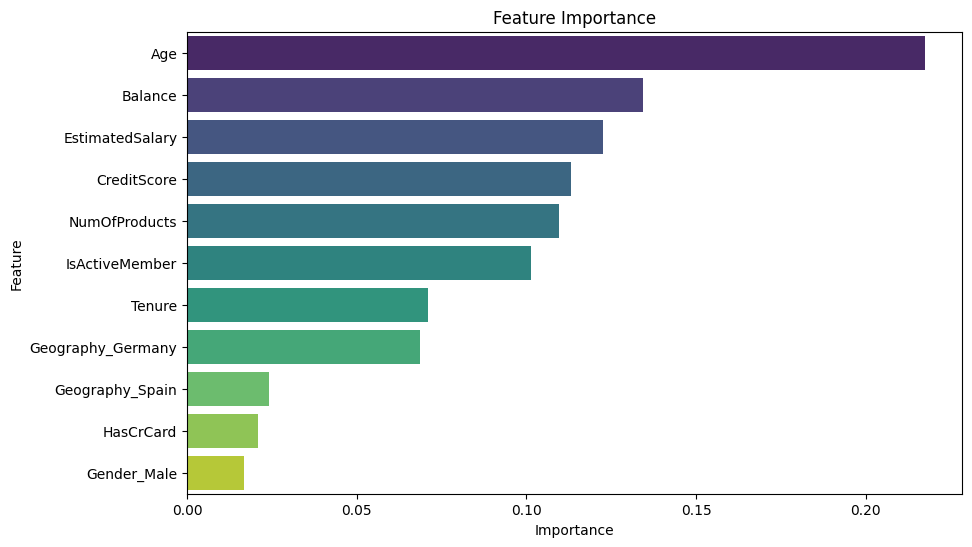

In [83]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices], palette="viridis")
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

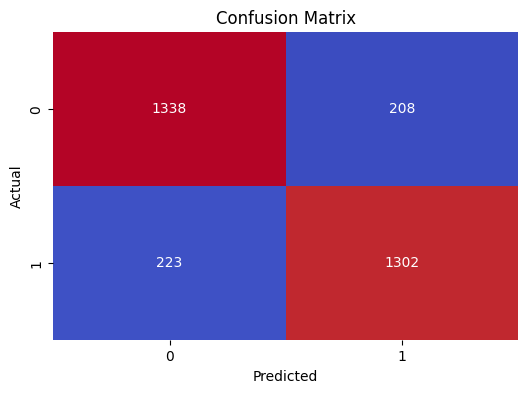

In [84]:

# Confusion matrix visualization for the Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
